In [1]:
import requests, pandas as pd, numpy as np
from pandas import DataFrame
from io import StringIO
import time, json
from datetime import date
import statsmodels
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
import statsmodels.tsa.api as tsa

from sklearn.metrics import mean_squared_error
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

plt.style.use('fivethirtyeight')

/Users/emily-air13/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
oil = pd.read_csv('../../data/oils_clean.csv', header=0)
oil.head()

,date,dcoilwtico
0,2013-01-01,93.140000
1,2013-01-02,93.140000
2,2013-01-03,92.970000
3,2013-01-04,93.120000
4,2013-01-05,93.146667


In [3]:
oil['date'] = pd.to_datetime(oil['date'], format = '%Y-%m-%d')
oil = oil.set_index('date')

In [4]:
# Convert to series object
data = oil['dcoilwtico']

Text(0.5,1,'Oil Barrel Prices')

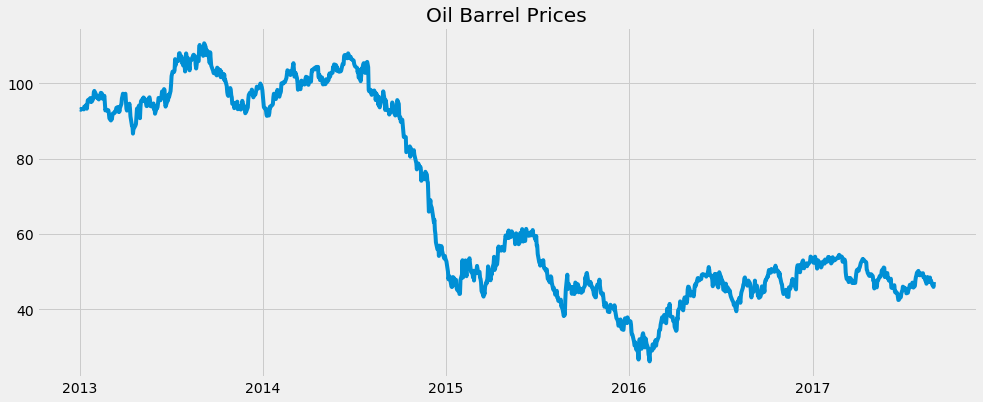

In [6]:
plt.plot(data.index.to_pydatetime(), data.values)
plt.title('Oil Barrel Prices')

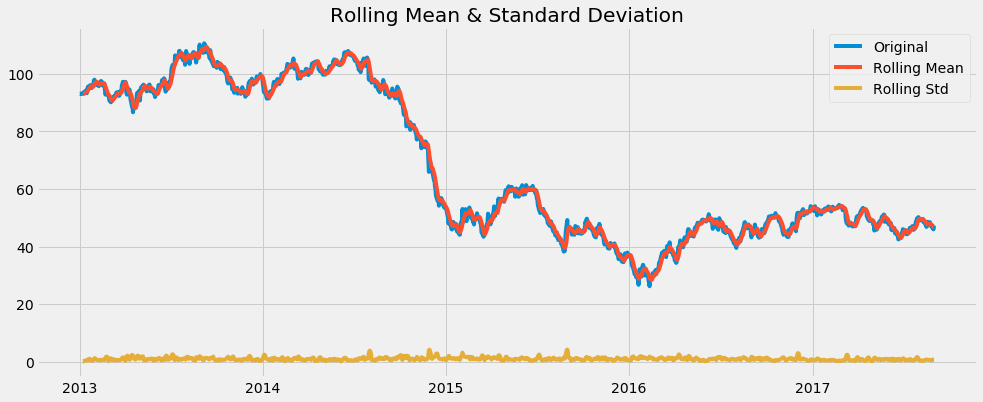

In [31]:
# Use Series rolling method, window is 7 for weekly average
rolmean = data.rolling(window=7).mean()
rolstd = data.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(data.index.to_pydatetime(), data.values, label='Original')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [10]:
#Perform Dickey-Fuller test:
test = adfuller(data, autolag='AIC')
test

(-0.87309179585786778,
 0.79670449248609621,
 0,
 1703,
 {'1%': -3.4341956747575719,
  '10%': -2.5676743155855317,
  '5%': -2.8632386494461093},
 4579.8350915268784)

In [23]:
print('ADF Statistic: \t\t' + str(test[0]))
print('P Value: \t\t' + str(test[1]))
print('Lags Used: \t\t' + str(test[2]))
print('Observations: \t\t' + str(test[3]))
for key,value in test[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test[5]))

ADF Statistic: 		-0.873091795858
P Value: 		0.796704492486
Lags Used: 		0
Observations: 		1703
Critical Value 1%: 	-3.43419567476
Critical Value 5%: 	-2.86323864945
Critical Value 10%: 	-2.56767431559
Information Criterion: 	4579.83509153


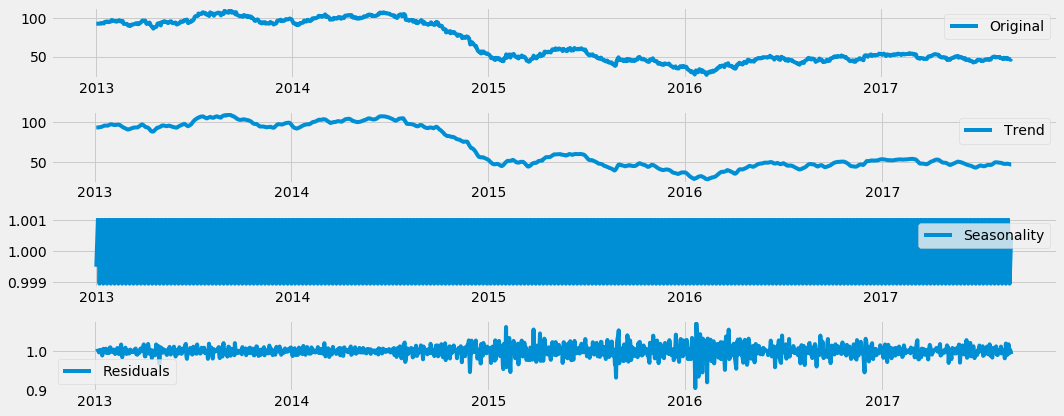

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data,model='multiplicative')

plt.subplot(411)
plt.plot(data.index.to_pydatetime(), data.values, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend.index.to_pydatetime(), decomposition.trend.values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal.index.to_pydatetime(),decomposition.seasonal.values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid.index.to_pydatetime(),decomposition.resid.values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [25]:
logs = np.log(data)

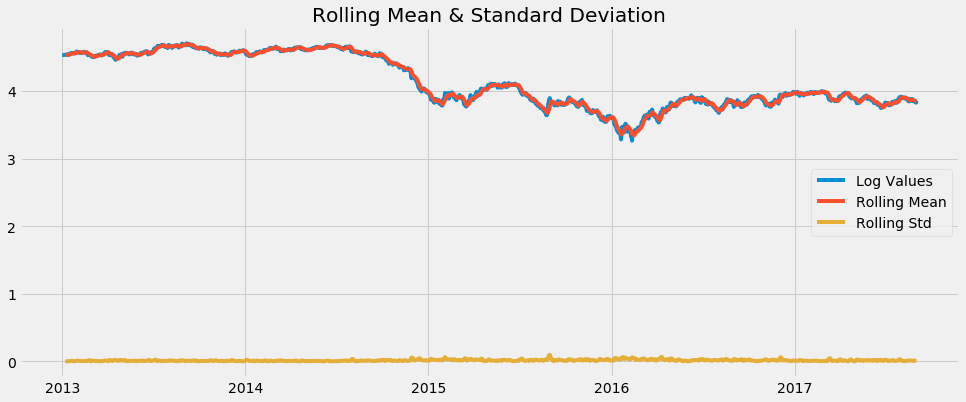

In [34]:
# Use Series rolling method, window is 7 for weekly average
rolmean = logs.rolling(window=7).mean()
rolstd = logs.rolling(window=7).std()

#Plot rolling statistics:
plt.close('all')
orig = plt.plot(logs.index.to_pydatetime(), logs.values, label='Log Values')
mean = plt.plot(rolmean.index.to_pydatetime(), rolmean.values, label='Rolling Mean')
std = plt.plot(rolstd.index.to_pydatetime(), rolstd.values, label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [29]:
test2 = adfuller(logs, autolag='AIC')
print('ADF Statistic: \t\t' + str(test2[0]))
print('P Value: \t\t' + str(test2[1]))
print('Lags Used: \t\t' + str(test2[2]))
print('Observations: \t\t' + str(test2[3]))
for key,value in test2[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test2[5]))

ADF Statistic: 		-1.0692035029
P Value: 		0.727195680376
Lags Used: 		0
Observations: 		1703
Critical Value 1%: 	-3.43419567476
Critical Value 5%: 	-2.86323864945
Critical Value 10%: 	-2.56767431559
Information Criterion: 	-8801.32975534


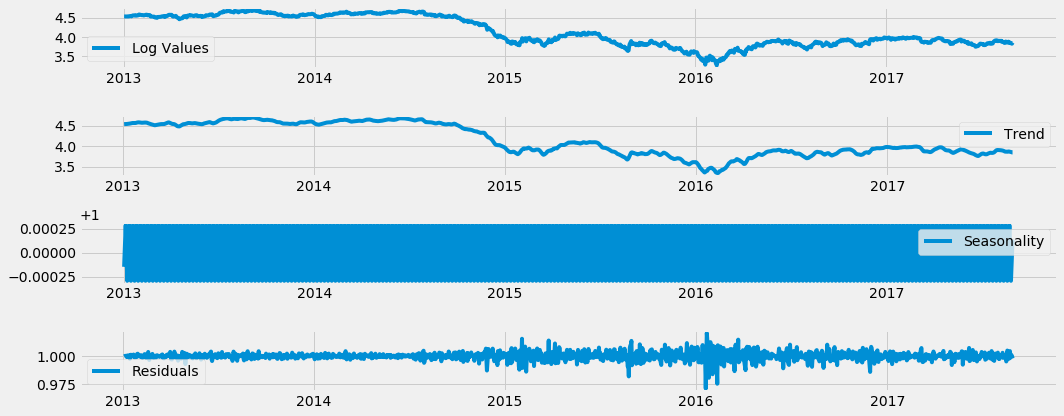

In [36]:
decomposition2 = seasonal_decompose(logs,model='multiplicative')

plt.subplot(411)
plt.plot(logs.index.to_pydatetime(), logs.values, label='Log Values')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition2.trend.index.to_pydatetime(), decomposition2.trend.values, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition2.seasonal.index.to_pydatetime(),decomposition2.seasonal.values,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition2.resid.index.to_pydatetime(),decomposition2.resid.values, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

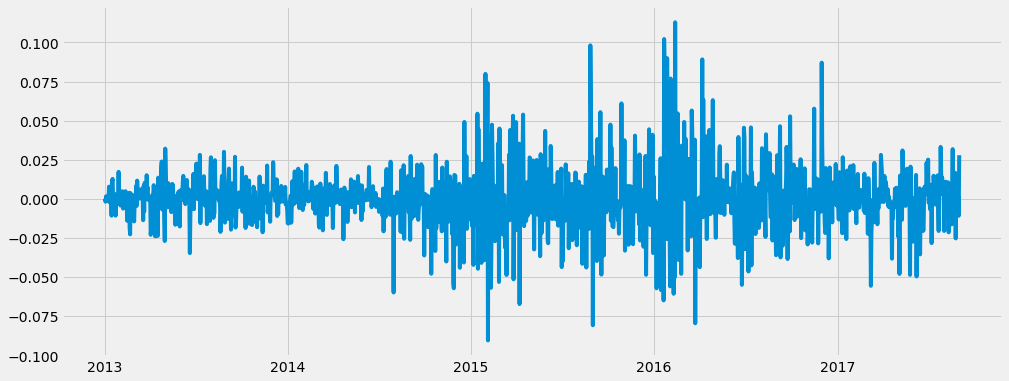

In [38]:
log_diff = logs - logs.shift()
plt.plot(log_diff.index.to_pydatetime(), log_diff.values)

In [40]:
log_diff.dropna(inplace=True)
test3 = adfuller(log_diff, autolag='AIC')
print('ADF Statistic: \t\t' + str(test3[0]))
print('P Value: \t\t' + str(test3[1]))
print('Lags Used: \t\t' + str(test3[2]))
print('Observations: \t\t' + str(test3[3]))
for key,value in test3[4].items():
    print('Critical Value ' + str(key) + ': \t' + str(value))
#print('Critical Values: \t' + str(test[4]))
print('Information Criterion: \t' + str(test3[5]))

ADF Statistic: 		-41.9245602587
P Value: 		0.0
Lags Used: 		0
Observations: 		1702
Critical Value 1%: 	-3.43419793768
Critical Value 5%: 	-2.86323964835
Critical Value 10%: 	-2.56767484748
Information Criterion: 	-8794.36614999
